In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# LOADING AND SPLITING THE DATASET
# https://www.cs.toronto.edu/~kriz/cifar.html --> dataset documentation

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#normalizing pixels values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

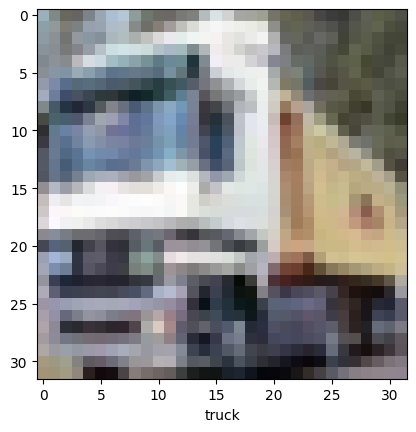

In [3]:
# LOOKING AT JUST ONE IMAGE
IMG_INDEX = 1 

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

BUILDING THE CONVOLUTIONAL BASE

LAYER 1: The input will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. 
We will also apply the function relu of each convolutional operation.

LAYER 2: This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

OTHER LAYERS: The next set of layers do very similar things but take as input the feature map from the previous layer.
They also increase frequency from 32 to 64. We do this so our data can shrink in spacial dimensions as it passed thought the layers,
meaning we can afford (computationally) to add more depth.

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # layer 1
model.add(layers.MaxPooling2D((2, 2))) # layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # other layers
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

c:\Users\igorm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary() # looking at our model

# we see that the depth of our image increases, but the spatial dimensions reduce drastically. (cause we do without the padding) 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# ADDING THE DENSE LAYERS
# we just done the convolutional base. Now we are adding a way to classify these extracted features.

model.add(layers.Flatten()) # flatten take the last layer and put it on a straight line (to apply the dense layers)
model.add(layers.Dense(64, activation='relu')) # normal neuron dense layer
model.add(layers.Dense(10)) # output layer of 10 (representing the number of classes we have)

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# TRAINING AND COMPILING THE MODEL
# we are using the recommended hyper parameters from TensorFlow

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=1,
                    validation_data=(test_images, test_labels))

Epoch 1/10
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 143s 3ms/step - accuracy: 0.4641 - loss: 1.5044 - val_accuracy: 0.5088 - val_loss: 1.4155
Epoch 2/10
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 144s 3ms/step - accuracy: 0.5774 - loss: 1.2208 - val_accuracy: 0.5929 - val_loss: 1.1861
Epoch 3/10
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 142s 3ms/step - accuracy: 0.6042 - loss: 1.1393 - val_accuracy: 0.5696 - val_loss: 1.2241
Epoch 4/10
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 138s 3ms/step - accuracy: 0.6225 - loss: 1.0978 - val_accuracy: 0.5731 - val_loss: 1.2452
Epoch 5/10
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 137s 3ms/step - accuracy: 0.6213 - loss: 1.0956 - val_accuracy: 0.6024 - val_loss: 1.1917
Epoch 6/10
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 136s 3ms/step - accuracy: 0.6317 - loss: 1.0907 - val_accuracy: 0.5666 - val_loss: 1.2657
Epoch 7/10
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 140s 3ms/step - accuracy: 0.6314 - loss: 1.0891 - val_accuracy: 0.6050 - val_loss: 1.1859
Epoch 8/10
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 139s 3ms/step - ac

In [ ]:
# EVALUATING THE MODEL

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1, batch_size=1)
print(test_acc)

# accuracy of 60%. witch is not bad for a simple model, but can be better with some other approaches

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.5746 - loss: 1.2821
0.5733000040054321


WORKING WITH SMALL DATASETS

In the situation that we don't have enough data to train a accurate model, there is some solutions we can do to dribble that situation

#1 DATA AUGMENTATION 

To avoid overfitting and create a larger dataset from a smaller one, we can use this technique called data augmentation.
This is simply performing random transformations (compressions, rotations stretches and color changes) on our images so our model can perform better. 

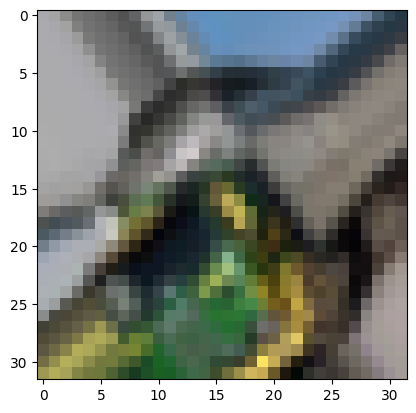

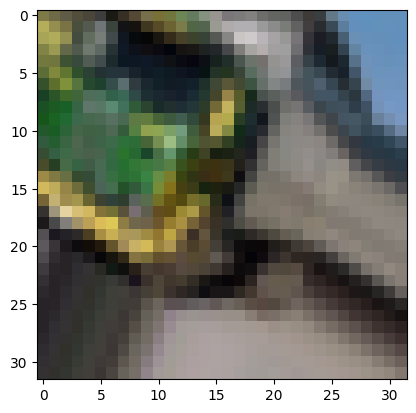

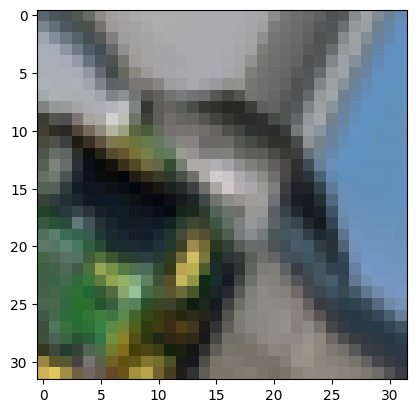

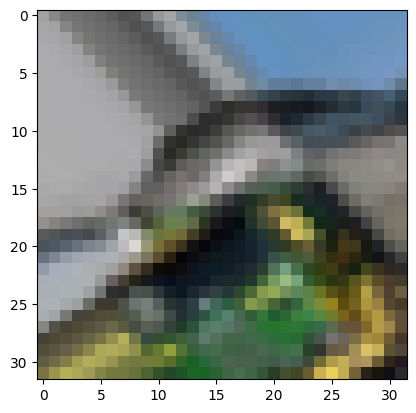

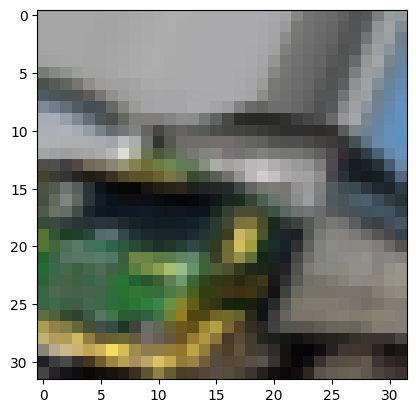

In [18]:
# fortunately keras can help us with data augmentation, like the below code

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# creating a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# picking an image to transform
test_img = train_images[14]
img = image.img_to_array(test_img) # convert image to numpy array
img = img.reshape((1,) + img.shape) # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'): # forever loop, that saves images to currently directory
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4: # show 4 images
        break
    
plt.show()

#2 PRETRAINED MODELS

Other way we can improve our model is to use a pretrained model as a base from our new model.
That means we can use a pretrained CNN model (with no dense layers) trained with millions of images before, as a start of our model.
We will need to add our own dense layered classifier at the end.

This method is called **FINE TUNING**

In [62]:
# This example of code is based on the guide from TensorFlow documentation: https://www.tensorflow.org/tutorials/images/transfer_learning

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import shutil
import random
keras = tf.keras

In [ ]:
# folder_path = "C:/Users/igorm/Desktop/projects/Datasets/PetImages/Cat"

# # Obter lista de arquivos na pasta
# image_files = os.listdir(folder_path)

# # Iterar sobre os arquivos e renomeá-los
# for index, filename in enumerate(image_files):
#     # Construir caminho completo do arquivo
#     old_path = os.path.join(folder_path, filename)
    
#     # Criar novo nome com prefixo "cat"
#     new_filename = f"cat_{index+1}_{filename}"
    
#     # Caminho completo do novo nome
#     new_path = os.path.join(folder_path, new_filename)
    
#     # Renomear o arquivo
#     os.rename(old_path, new_path)

folder_path = "C:/Users/igorm/Desktop/projects/Datasets/PetImages/Dog"

# Obter lista de arquivos na pasta
image_files = os.listdir(folder_path)

# Iterar sobre os arquivos e renomeá-los
for index, filename in enumerate(image_files):
    # Construir caminho completo do arquivo
    old_path = os.path.join(folder_path, filename)
    
    # Criar novo nome com prefixo "cat"
    new_filename = f"dog_{index+1}_{filename}"
    
    # Caminho completo do novo nome
    new_path = os.path.join(folder_path, new_filename)
    
    # Renomear o arquivo
    os.rename(old_path, new_path)

In [69]:
# Diretórios
data_dir = "C:/Users/igorm/Desktop/projects/Datasets/PetImages"
output_dir = "C:/Users/igorm/Desktop/projects/Datasets/Organized_PetImages"

# Criar diretórios para o dataset organizado
splits = ["train", "validation", "test"]
categories = ["cat", "dog"]

for split in splits:
    for category in categories:
        os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)

# Coletar imagens e organizar por classe
image_paths = {"cat": [], "dog": []}

for category in categories:
    class_path = os.path.join(data_dir, category.capitalize())  # Ajustando nomes das pastas (Cat/Dog)
    if os.path.exists(class_path):
        image_paths[category] = [
            os.path.join(class_path, img) for img in os.listdir(class_path) if img.lower().endswith((".jpg", ".png"))
        ]

# Embaralhar imagens
random.seed(42)  # Garantir reprodutibilidade
for category in categories:
    random.shuffle(image_paths[category])

# Função para dividir os dados
def split_data(image_list, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    total = len(image_list)
    train_end = int(total * train_ratio)
    val_end = train_end + int(total * val_ratio)

    train_set = image_list[:train_end]
    val_set = image_list[train_end:val_end]
    test_set = image_list[val_end:]

    return train_set, val_set, test_set

# Aplicar divisão para cada classe
split_images = {category: split_data(image_paths[category]) for category in categories}

# Função para copiar imagens para a nova estrutura
def move_images(image_list, destination_folder):
    for image_path in image_list:
        filename = os.path.basename(image_path)
        new_path = os.path.join(destination_folder, filename)
        shutil.copy(image_path, new_path)

# Copiar imagens para as pastas corretas
for i, split in enumerate(splits):
    for category in categories:
        move_images(split_images[category][i], os.path.join(output_dir, split, category))

print("✅ Dataset organizado com sucesso!")


✅ Dataset organizado com sucesso!


In [70]:
from datasets import load_dataset
dataset = load_dataset("C:/Users/igorm/Desktop/projects/Datasets/Organized_PetImages")

Generating train split: 20000 examples [00:01, 18487.24 examples/s]
Generating validation split: 2500 examples [00:00, 17694.62 examples/s]
Generating test split: 2500 examples [00:00, 18136.75 examples/s]


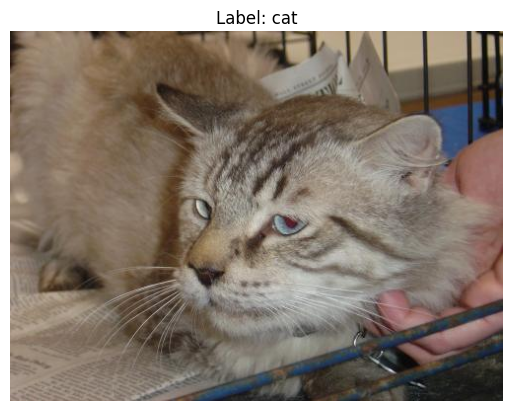

In [91]:
label_map = {0: "cat", 1: "dog"}  # Ajuste conforme seu dataset

for i in range(1):
    sample = dataset["train"][i]
    plt.figure()
    plt.imshow(sample["image"])
    plt.title(f"Label: {label_map[sample['label']]}")
    plt.axis("off")
plt.show()